In [1]:
import os
import getpass
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)

np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=np.inf)
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 50)
    
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

In [2]:
def validate(df):
    """
    Input: Dataframe
    Output: Report for Zeros and Nulls
    """
    report = pd.DataFrame(columns=["Feature_Name","Zero_Count","Zero_Percentage", "Null_Count", "Null_Percentage"])
    zeros = (df == 0).astype(int).sum(axis=0).values
    nulls = df.isnull().sum().values
    nuniques = df.nunique().values
    report["Unique_values"] = nuniques
    report["Feature_Name"] = df.columns
    report["Zero_Count"] = zeros
    report["Zero_Percentage"] = zeros/df.shape[0]*100
    report["Null_Count"] = nulls
    report["Null_Percentage"] = nulls/df.shape[0]*100
    report.sort_values(["Null_Percentage"], ascending=False, inplace=True)
    report = report.reset_index(drop=True)
    return report

In [19]:
path = '/Users/fadi.baskharon/github/cycle_prediction/data/'

flist = os.listdir(path)
dfs = pd.DataFrame()

for f in flist:
    if 'bpi_12_w.csv' in f:
        df = pd.read_csv(path + f, delimiter=',')

#         if 'incidents.csv' in f:
#             df['type'] = 'incident'
#         elif 'problems.csv' in f:
#             df['type'] = 'problem'
        dfs = pd.concat([dfs, df], axis=0)

dfs['CompleteTimestamp'] = pd.to_datetime(dfs['CompleteTimestamp'])
print(dfs.shape)

(72413, 3)


In [28]:
np.random.seed(42)
msk = np.random.rand(len(df)) < 0.7
train = dfs[msk]
test = dfs[~msk]

msk = np.random.rand(len(train)) < 0.5
val = train[~msk]
train = train[msk]

print(len(train),len(val),len(test))

25336 25470 21607


In [20]:
dfs = dfs.rename(columns={'Case ID': 'CaseID', 'Activity':'ActivityID', 'Complete Timestamp':'CompleteTimestamp'})
dfs.head()

,CaseID,ActivityID,CompleteTimestamp
0,173688,3,2011-10-01 19:45:13
1,173688,5,2011-10-01 20:17:08
2,173688,5,2011-10-09 00:32:00
3,173688,5,2011-10-10 19:33:05
4,173688,6,2011-10-13 18:37:37


In [13]:
tmp = dfs.groupby(['CaseID']).agg({'Resource':'unique'})
tmp['count'] = tmp['Resource'].apply(lambda x:len(x))
tmp

,Resource,count
CaseID,,
173688,"[112.0, nan, 10862.0, 10913.0, 11049.0, 10629.0]",6
173691,"[112.0, nan, 10862.0, 11120.0, 11049.0, 10809.0]",6
173694,"[112.0, 10912.0, nan, 11201.0, 11119.0, 10861....",11
173697,[112.0],1
173700,[112.0],1
...,...,...
214364,"[112.0, 11169.0, 11003.0, 10789.0]",4
214367,[112.0],1
214370,"[112.0, 11169.0]",2


In [22]:
path = '/Users/fadi.baskharon/Dropbox/Data Science/01 - Masters/10 - (CIT-702) - Thesis/bpic17/'

flist = os.listdir(path)
dfs = pd.DataFrame()

for f in flist:
    if 'BPI Challenge 2017.csv' in f:
        dfs = pd.read_csv(path + f, delimiter=';')

dfs['Complete Timestamp'] = pd.to_datetime(dfs['Complete Timestamp'])
print(dfs.shape)
print(dfs[dfs.columns[0]].nunique())

(561671, 22)
31509


In [24]:
dfs = dfs.rename(columns={'Case ID': 'CaseID', 'Activity':'ActivityID', 'Complete Timestamp':'CompleteTimestamp'})
dfs.head()

,CaseID,ActivityID,Resource,Start Timestamp,CompleteTimestamp,Variant,Variant index,(case) ApplicationType,(case) LoanGoal,(case) RequestedAmount,Accepted,Action,CreditScore,EventID,EventOrigin,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms,OfferID,OfferedAmount,Selected,lifecycle:transition
0,Application_652823628,A_Create Application,User_1,2016/01/01 10:51:15.304,2016-01-01 10:51:15.304,Variant 2,2,New credit,Existing loan takeover,20000.0,NaN,Created,NaN,Application_652823628,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete
1,Application_652823628,A_Submitted,User_1,2016/01/01 10:51:15.352,2016-01-01 10:51:15.352,Variant 2,2,New credit,Existing loan takeover,20000.0,NaN,statechange,NaN,ApplState_1582051990,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete
2,Application_652823628,A_Concept,User_1,2016/01/01 10:52:36.413,2016-01-01 10:52:36.413,Variant 2,2,New credit,Existing loan takeover,20000.0,NaN,statechange,NaN,ApplState_642383566,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete
3,Application_652823628,W_Complete application,User_17,2016/01/02 11:45:22.429,2016-01-02 11:45:22.429,Variant 2,2,New credit,Existing loan takeover,20000.0,NaN,Obtained,NaN,Workitem_1875340971,Workflow,NaN,NaN,NaN,NaN,NaN,NaN,start
4,Application_652823628,A_Accepted,User_52,2016/01/02 12:23:04.299,2016-01-02 12:23:04.299,Variant 2,2,New credit,Existing loan takeover,20000.0,NaN,statechange,NaN,ApplState_99568828,Application,NaN,NaN,NaN,NaN,NaN,NaN,complete


In [25]:
tmp = dfs.groupby(['CaseID']).agg({'Resource':'unique'})
tmp['count'] = tmp['Resource'].apply(lambda x:len(x))
tmp

,Resource,count
CaseID,,
Application_1000086665,"[User_1, User_14, User_5]",3
Application_1000158214,"[User_1, User_32, User_118, User_90]",4
Application_1000311556,"[User_71, User_1]",2
Application_1000334415,"[User_1, User_91, User_119, User_121, User_68]",5
Application_1000339879,"[User_1, User_28, User_75, User_119, User_24, ...",7
...,...,...
Application_999507989,"[User_1, User_41, User_16, User_116, User_101,...",6
Application_999544538,"[User_1, User_27, User_32, User_5, User_95, Us...",9
Application_999632431,"[User_1, User_94]",2


In [6]:
# dfs = dfs.replace('nan', np.nan)
# dfs['article'] = dfs['article'].fillna(method='ffill')
# dfs['Resource'] = dfs['Resource'].fillna(method='ffill')
# dfs['amount'] = dfs['amount'].fillna(method='ffill')
# dfs['vehicleClass'] = dfs['vehicleClass'].fillna(method='ffill')

# dfs['article'] = dfs['article'].astype('str')
# dfs['Resource'] = dfs['Resource'].astype('str')
# dfs['vehicleClass'] = dfs['vehicleClass'].astype('str')
# dfs['amount'] = dfs['amount'].astype('float')

In [5]:
validate(dfs)

,Feature_Name,Zero_Count,Zero_Percentage,Null_Count,Null_Percentage,Unique_values
0,Resource,0,0.000000,18010,6.868802,68
1,CaseID,0,0.000000,0,0.000000,13087
2,ActivityID,0,0.000000,0,0.000000,36
3,CompleteTimestamp,0,0.000000,0,0.000000,248189
4,Variant,0,0.000000,0,0.000000,4366
5,Variant index,0,0.000000,0,0.000000,4366
6,(case) AMOUNT_REQ,11,0.004195,0,0.000000,631
7,concept:name,0,0.000000,0,0.000000,24
8,lifecycle:transition,0,0.000000,0,0.000000,3


In [7]:
# dfs['amount_cat'] = dfs['amount']
# dfs['amount_cat'] = pd.cut(dfs['amount_cat'], bins=[-np.inf,35,100,+np.inf],include_lowest=False, labels=['low', 'medium', 'high'])
# sns.countplot(dfs['amount_cat']);

In [50]:
def duration(df):
    return (df['CompleteTimestamp'].max() - df['CompleteTimestamp'].min()).total_seconds()/86400

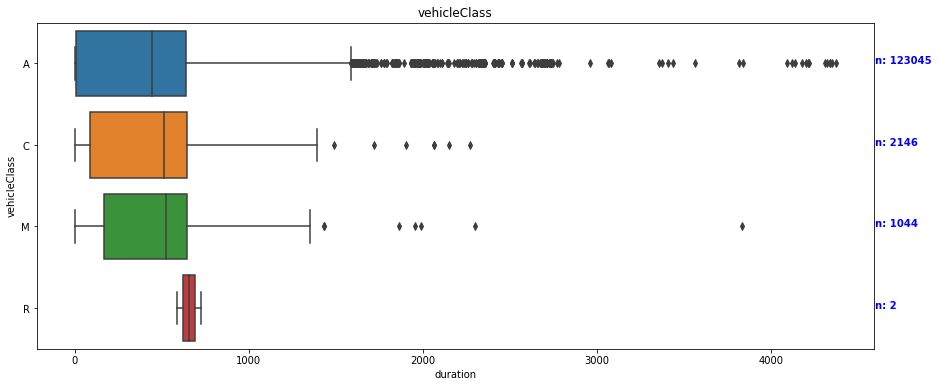

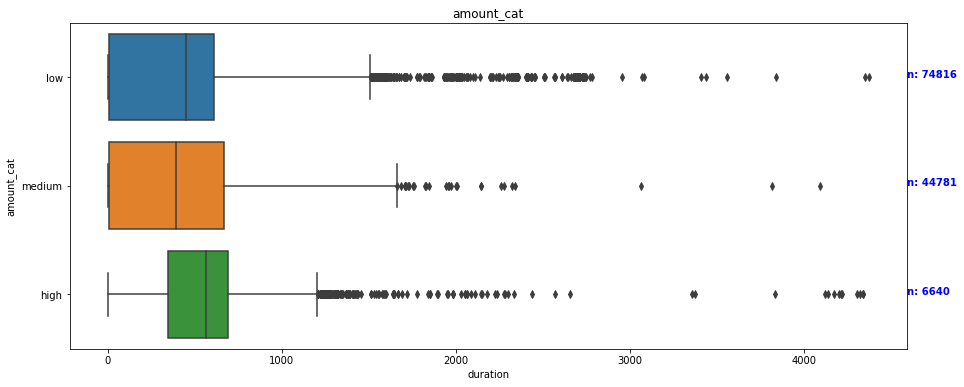

In [51]:
for col in dfs.columns:
    if col in [ 'vehicleClass', 'amount_cat']:
        tmp = pd.DataFrame(dfs.groupby('CaseID').apply(lambda x: [duration(x), x[col].unique()[0]]))
        tmp = pd.DataFrame(tmp[0].to_list(), columns=['duration',col])
        plt.figure(figsize=(15,6));
        plt.title(col);
        ax = sns.boxplot(x=tmp['duration'], y=tmp[col], orient='h');
        
        # Calculate number of obs per group & median to position labels
        nobs = dfs.drop_duplicates(subset=['CaseID'])[col].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add it to the plot
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(ax.get_xlim()[1] + 5,pos[tick], nobs[tick],
            horizontalalignment='left', size='medium', color='b', weight='semibold')

        plt.show();

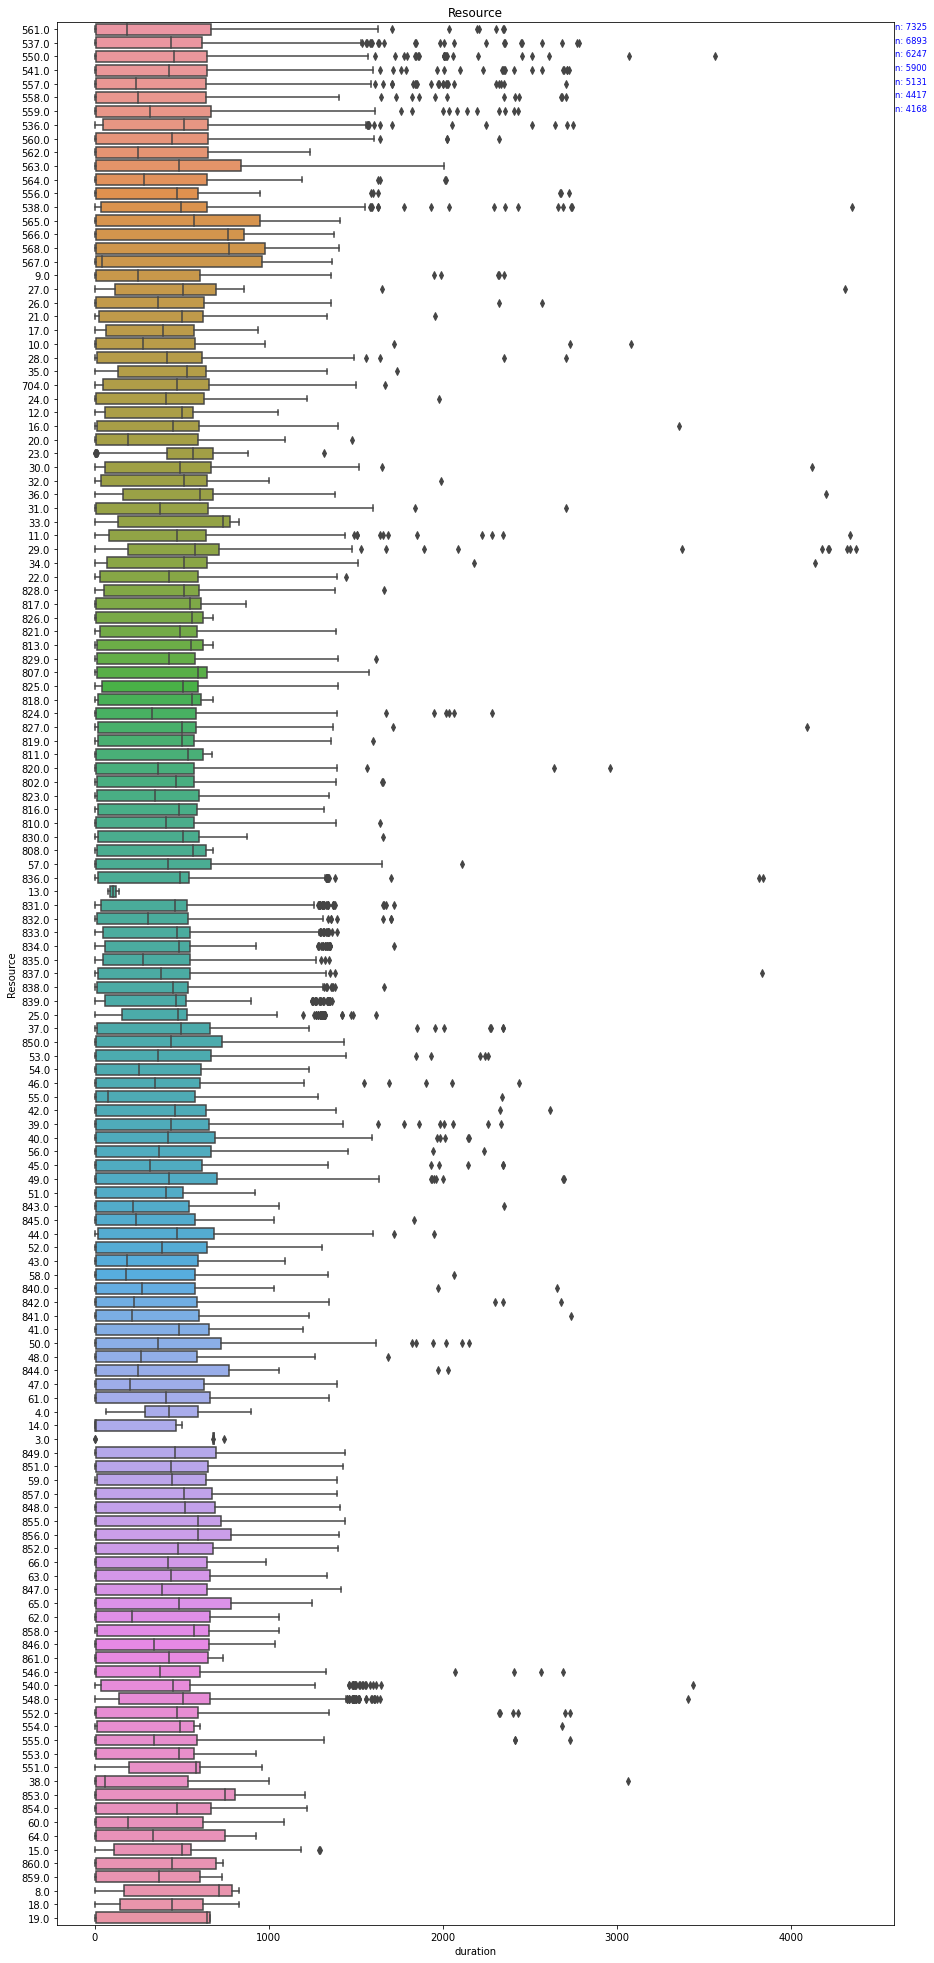

In [52]:
for col in dfs.columns:
    if col in ['Resource']:
        tmp = pd.DataFrame(dfs.groupby('CaseID').apply(lambda x: [duration(x), x[col].unique()[0]]))
        tmp = pd.DataFrame(tmp[0].to_list(), columns=['duration',col])
        plt.figure(figsize=(15,35));
        plt.title(col);
        ax = sns.boxplot(x=tmp['duration'], y=tmp[col], orient='h');

        # Calculate number of obs per group & median to position labels
        nobs = dfs.drop_duplicates(subset=['CaseID'])[col].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add it to the plot
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(ax.get_xlim()[1] + 5,pos[tick], nobs[tick],
            horizontalalignment='left', size='small', color='b')
        plt.show();

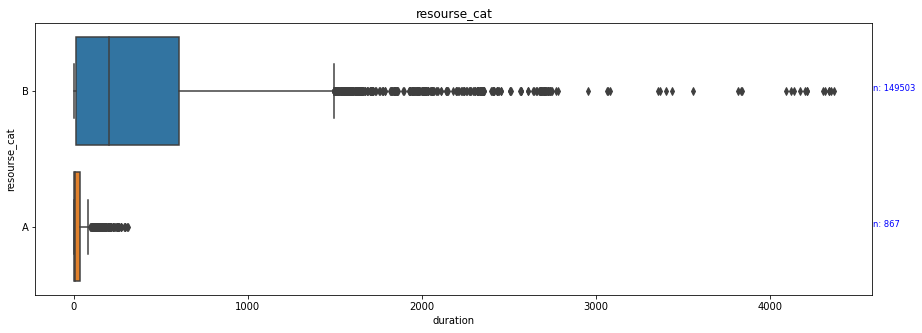

In [29]:
low_res = ['13.0', '862.0', '864.0', '865.0', '866.0', '867.0', '868.0', '869.0', '870.0']
def mapping(x):
    if x in low_res:
        x = 'A'
    else:
        x = 'B'
    return x
dfs['resourse_cat'] = dfs['Resource'].apply(lambda x: mapping(x))

for col in dfs.columns:
    if col in ['resourse_cat']:
        tmp = pd.DataFrame(dfs.groupby('CaseID').apply(lambda x: [duration(x), x[col].unique()[0]]))
        tmp = pd.DataFrame(tmp[0].to_list(), columns=['duration',col])
        plt.figure(figsize=(15,5));
        plt.title(col);
        ax = sns.boxplot(x=tmp['duration'], y=tmp[col], orient='h');

        # Calculate number of obs per group & median to position labels
        nobs = dfs.drop_duplicates(subset=['CaseID'])[col].value_counts().values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]

        # Add it to the plot
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(ax.get_xlim()[1] + 5,pos[tick], nobs[tick],
            horizontalalignment='left', size='small', color='b')
        plt.show();

In [34]:
cols = [
    'CaseID',
    'ActivityID',
#     'Resource',
    'CompleteTimestamp',
#     'amount',
    'amount_cat',
#     'article',
#     'vehicleClass',
    'resourse_cat'
]

In [35]:
dfs = dfs[cols]
dfs.head(50)

,CaseID,ActivityID,CompleteTimestamp,amount_cat,resourse_cat
0,A1,Create Fine,2006-07-24,low,B
1,A1,Send Fine,2006-12-05,low,B
2,A100,Create Fine,2006-08-02,low,B
3,A100,Send Fine,2006-12-12,low,B
4,A100,Insert Fine Notification,2007-01-15,low,B
5,A100,Add penalty,2007-03-16,medium,B
6,A100,Send for Credit Collection,2009-03-30,medium,B
7,A10000,Create Fine,2007-03-09,medium,B
8,A10000,Send Fine,2007-07-17,medium,B
9,A10000,Insert Fine Notification,2007-08-02,medium,B


In [36]:
dfs.groupby('CaseID').nunique().max()

ActivityID           10
CompleteTimestamp    18
amount_cat            2
resourse_cat          1
dtype: int64

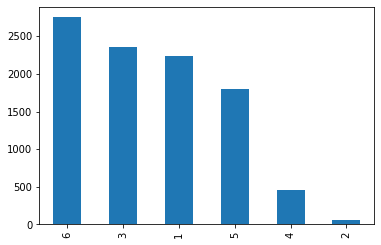

In [21]:
dfs['CompleteTimestamp'] = pd.to_datetime(dfs['CompleteTimestamp'])
dfs = dfs.sort_values(by='CompleteTimestamp')
dfs.drop_duplicates(subset=['CaseID'],keep='last')['ActivityID'].value_counts().plot(kind='bar');

[]

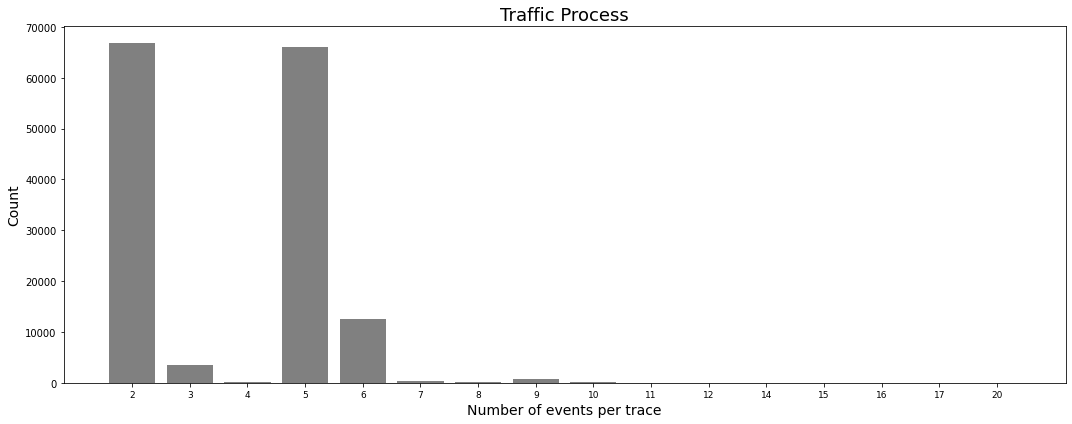

In [40]:
fig = plt.figure(figsize=(15, 6)) 
sns.countplot(dfs.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"], color='gray')
plt.xticks(rotation=0, fontsize=9)
plt.xlabel("Number of events per trace", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Traffic Process",fontsize=18)
plt.tight_layout()
plt.plot()

In [142]:
dfs.to_csv('../data/road_traffic.csv', index=False)

# Development

In [29]:

import sys
sys.path.insert(0, '../')
import os
from cycle_prediction.t2e import t2e
from cycle_prediction.weibull_utils import check_dir
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")


path = '../data/'
check_dir(path)

a = os.path.join(path, 'helpdesk.csv')
b = os.path.join(path, 'bpi_12_w.csv')
c = os.path.join(path, 'bpi_12_w_no_repeat.csv')
d = os.path.join(path, 'env_permit.csv')
e = os.path.join(path, 'bpic13_all.csv')
f = os.path.join(path, 'Sepsis_Cases_processed.csv')
g = os.path.join(path, 'road_traffic.csv')
h = os.path.join(path, 'bpic15_2.csv')

a = pd.read_csv(a)
b = pd.read_csv(b)
c = pd.read_csv(c)
d = pd.read_csv(d)
e = pd.read_csv(e)
f = pd.read_csv(f)
g = pd.read_csv(g)
h = pd.read_csv(h)


df_name = {
    'a': 'helpdesk',
    'b': 'bpi12',
    'c': 'bpi12_norep',
    'd': 'env',
    'e': 'bpic13_all',
    'f': 'Sepsis',
    'g': 'Road_traffic',
    'h': 'bpic15'
}

df_dict = {
    'a': a,
    'b': b,
    'c': c,
    'd': d,
    'e': e,
    'f': f,
    'g': g,
    'h': h,
}

range_dict = {
    'a': range(2, 8, 1),
    'b': range(2, 22, 2),
    'c': range(2, 12, 2),
    'd': range(2, 22, 2),
    'e': range(2, 22, 2),
    'f': range(3, 11, 1),
    'g': range(1, 6, 1),
    'h': range(5, 30, 5)
}

end_event_dict = {
    'a': [1,2,3,4,5,6],
    'b': [1,2,3,4,5,6],
    'c': [1,2,3,4,5,6],
    'd': [1,2,3,4,5,6],
    'e': ['Completed+Closed', 'Completed+In Call', 'Completed-Closed',
          'Completed+Resolved', 'Completed+Cancelled', 'Completed-Cancelled'],
    'f': ['Release A', 'Release B', 'Release C', 'Release D', 'Release E',
          'Return ER'],
    'g': ['Payment', 'Send for Credit Collection'],
    'h': ['01_HOOFD', '01_BB', '08_AWB45', '05_EIND', '13_CRD', '14_VRIJ',
          '10_UOV', '99_NOCODE', '04_BPT', '06_VD', '12_AP', '01_OLO',
          '02_DRZ', '16_LGSD', '09_AH', '16_LGSV', '03_VD', '03_GBH',
          '07_OPS', '10_OLO', '11_AH']
}

cols = ["prefix", "Layer_Size", "MAE", "unique_pred", "train_size",
        "val_size", "test_size", "Censored %", "fit_time"]


Using TensorFlow backend.


In [204]:
exp_dict = {
    1: {
      'mae_path': '../output/maes/prc/',
      'dynamic_features': ['ActivityID'],
      'static_features': [],
      'transform': 'log'
    },

}

dataset = 'a'
res = 'd'
extra_censored = 0
fit_type = 't2e'
censored = True
size_dyn = 4



for exp, v in exp_dict.items():
    mae_path = v['mae_path']
    check_dir(mae_path)    
    grid_results = pd.DataFrame(columns=cols)
    for prefix in range_dict[dataset]:
        t2e_obj = t2e(
            dataset=df_dict[dataset],
            prefix=prefix,
            resolution=res,
            dynamic_features=exp_dict[exp]['dynamic_features'],
            static_features=exp_dict[exp]['static_features'],
            fit_type='t2e',
            transform=exp_dict[exp]['transform'],
            end_event_list=end_event_dict[dataset],
            censored=censored
        )
        t2e_obj.train_val_test_split()
        t2e_obj.preprocess(extra_censored=extra_censored)
        X_train, X_val, X_test, y_train, y_val, y_test = t2e_obj.xy_split()
#         try:
#             t2e_obj.build_model(X_train, y_train,
#                                 size_dyn=8, size_sta=4)
#             t2e_obj.fit(X_train, y_train, X_val, y_val,
#                         bs=128, exp_dir=dataset+'_'+str(exp)+'_'+str(prefix),
#                         vb=False)
#         except Exception:
#             try:
#                 t2e_obj.build_model(X_train, y_train,
#                                     size_dyn=8, size_sta=4)
#                 t2e_obj.fit(X_train, y_train, X_val, y_val,
#                             bs=64,
#                             exp_dir=dataset+'_'+str(exp)+'_'+str(prefix),
#                             vb=False)
#             except Exception:
#                 t2e_obj.build_model(X_train, y_train,
#                                     size_dyn=8, size_sta=4)
#                 t2e_obj.fit(X_train, y_train, X_val, y_val,
#                             bs=32,
#                             exp_dir=dataset+'_'+str(exp)+'_'+str(prefix),
#                             vb=False)

#         test_result_df, mae = t2e_obj.evaluate(X_test, y_test)
#         nunique = test_result_df["T_pred"].nunique()
#         cen_percentage = t2e_obj.get_cen_prc()
#         grid_results = grid_results.append(
#             pd.DataFrame([[prefix, size_dyn, mae, nunique, len(X_train[0]),
#                            len(X_val[0]), len(X_test[0]), cen_percentage,
#                            t2e_obj.fit_time]], columns=cols),
#             ignore_index=True)
#     grid_results
    
    
    
# pickle.dump(grid_results, open(mae_path + dataset + str(extra_censored)+
#                         '_GRU.pkl', 'wb'))


INFO 2021-04-24 20:39:42 - ========================================================
INFO 2021-04-24 20:39:42 - Prefix = 2
INFO 2021-04-24 20:39:42 - Total cases: 3804
INFO 2021-04-24 20:39:42 - Prefix cases: 3626
INFO 2021-04-24 20:39:42 - ========================
INFO 2021-04-24 20:39:42 - TRAINING SET
INFO 2021-04-24 20:39:42 - Censored cases: 0
INFO 2021-04-24 20:39:42 - Observed cases: 1396
INFO 2021-04-24 20:39:47 - Y_label has been transformed to logarithmic scale
INFO 2021-04-24 20:39:47 - ========================
INFO 2021-04-24 20:39:47 - VALIDATION SET
INFO 2021-04-24 20:39:47 - Observed cases: 1142
INFO 2021-04-24 20:39:51 - Y_label has been transformed to logarithmic scale
INFO 2021-04-24 20:39:51 - ========================
INFO 2021-04-24 20:39:51 - TEST SET
INFO 2021-04-24 20:39:51 - Observed cases: 1088
INFO 2021-04-24 20:39:55 - Y_label has been transformed to logarithmic scale
INFO 2021-04-24 20:39:55 - ========================
INFO 2021-04-24 20:39:55 - Dynamic Featur